<a href="https://colab.research.google.com/github/iobis/pyobis/blob/main/notebooks/occurrences_ocean_sunfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using pyobis to to explore OBIS occurrences records
The [Ocean Biodiversity Information System (OBIS)](https://obis.org) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development.
OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.

In this notebook we will use [`pyobis`](https://github.com/iobis/pyobis) to search occurrence records for ocean sunfish species.

## Installing pyobis

In [6]:
try:
  import pyobis
except:
  !pip install -q "git+https://github.com/iobis/pyobis.git"

Adding other modules

In [7]:
import pandas as pd
import numpy
from pyobis.occurrences import OccQuery
occ = OccQuery()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Grabbing the data
We will first gather some occurrences records for *Mola mola* (Ocean Sunfish) and analyze it before moving on to some more species of sunfishes.

We are going to use `search` function inside the `occurrences` module. We also want to extract `MeausermentOrFact` Records.

In [8]:
res = occ.search(taxonid=127405)
df = pd.DataFrame(res["results"])
df # Let's preview the data we acquired


Fetched 20978 records.


,infraphylum,date_year,scientificNameID,scientificName,individualCount,associatedReferences,dropped,gigaclassid,aphiaID,decimalLatitude,subclassid,type,gigaclass,infraphylumid,taxonRemarks,phylumid,familyid,catalogNumber,occurrenceStatus,basisOfRecord,terrestrial,modified,id,parvphylum,order,recordNumber,georeferencedDate,verbatimEventDate,dataset_id,decimalLongitude,collectionCode,date_end,speciesid,occurrenceID,license,date_start,genus,dateIdentified,ownerInstitutionCode,bibliographicCitation,...,verbatimDepth,habitat,municipality,stateProvince,parentNameUsageID,organismID,collectionID,continent,taxonID,locationRemarks,countryCode,locationID,parentEventID,startDayOfYear,accessRights,island,preparations,county,verbatimLocality,lifeStage,higherClassification,otherCatalogNumbers,higherGeography,georeferenceSources,establishmentMeans,endDayOfYear,georeferenceVerificationStatus,organismQuantity,organismQuantityType,verbatimLatitude,verbatimLongitude,islandGroup,typeStatus,associatedSequences,namePublishedInID,verbatimCoordinateSystem,disposition,originalNameUsage,associatedMedia,dataGeneralizations
0,Gnathostomata,2007.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",False,10194,127405,42.380000,293496,Event,Actinopterygii,1828,"Taxon recorded as ""OCSU"" by the provider",1821,125609,1891_754,present,HumanObservation,False,2018-10-06 18:57:21,00017274-6ee1-449e-8e69-baa515c214f5,Osteichthyes,Tetraodontiformes,1891_754,2007-08-20T18:22:47,2007-08-20 18:22:47,7009678a-05ed-49fe-9033-c3d81f3bb19b,-65.370000,1891,1.187568e+12,127405,1891_754,http://creativecommons.org/licenses/by-nc/4.0/,1.187568e+12,Mola,2007-08-20T18:22:47,NOAA;NMFS;NEFSC,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,2019.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,10194,127405,34.541400,293496,NaN,Actinopterygii,1828,"Taxon recorded as ""Ocean Sunfish"" by the provider",1821,125609,2161_30409,present,HumanObservation,False,2021-10-15 16:15:00,0004f9a5-b886-4894-8564-29dff6fc12f2,Osteichthyes,Tetraodontiformes,2161_30409,2019-12-12T11:15:53,2019-12-12 11:15:53,0ff4be1c-4f94-4599-b782-b7cb8f5db151,-77.159400,2161,1.576109e+12,127405,2161_30409,http://creativecommons.org/licenses/by/4.0/,1.576109e+12,Mola,2019-12-12T11:15:53,NORMANDEAU,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,2012.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,NaN,False,10194,127405,43.107460,293496,NaN,Actinopterygii,1828,NaN,1821,125609,I1422766201,present,HumanObservation,False,2014-04-30 15:51:43,00057b1c-4162-4f4f-94d2-8d6728642636,Osteichthyes,Tetraodontiformes,NaN,NaN,NaN,9a81d405-545b-4a1b-bdaa-aff5350a0c39,4.902900,I142,1.337904e+12,127405,urn:catalog:MNHN-SPN:I142:I1422766201,NaN,1.337904e+12,Mola,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,1979.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Cetacean a...",False,10194,127405,41.333000,293496,Event,Actinopterygii,1828,"Taxon recorded as ""Ocean Sunfish/Sharp-tailed ...",1821,125609,283_23523,present,HumanObservation,False,2005-05-06 20:05:14,000595fb-2564-4ee6-81bc-4b0f047974af,Osteichthyes,Tetraodontiformes,283_23523,1979-09-07T09:55:00,1979-09-07 09:55:00,6669ce88-d264-42a5-b34c-bb7f01c3952c,-67.767000,283,3.055104e+11,127405,283_23523,http://creativecommons.org/licenses/by-nc/4.0/,3.055104e+11,Mola,1979-0

Now that we have got our data let's see the specifics.
+ We have got 20,972 rows of data for just *Mola mola*.
+ There are numerous columns like `scientificName`, `year`, `infraphylum`, `class`, `kingdom`, etc,. more information about which can be found at [OBIS](https://obis.org)

Let us begin by plotting the number of occurrence records that have been recorded for *Mola mola* in particular over years. We will investigate this data plotting a `countplot` (*we are using `seaborn` since it is pretty easy to use and yields some very nice plots*) for the number of records v/s year of taking the record.

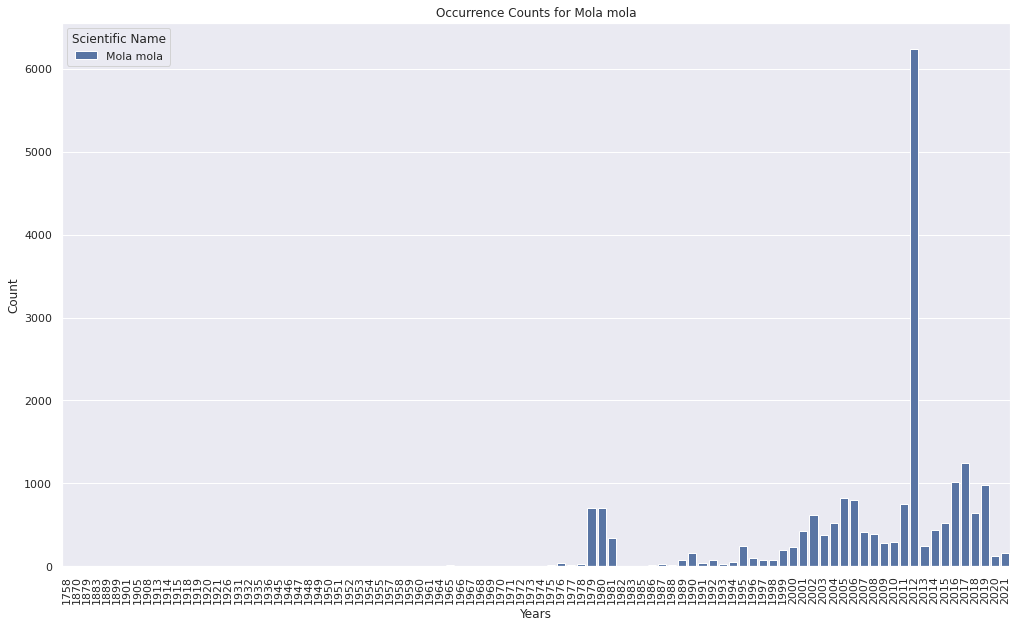

In [9]:
df = df.sort_values(by='date_year') # We will sort the data according to year
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(17,10)})
p = sns.countplot(data=df,x='date_year',hue='scientificName')
p.set_xlabel("Years")
p.set_ylabel("Count")
p.set_xticklabels(df.date_year.unique().astype(int),rotation=90)
p.set_title("Occurrence Counts for Mola mola")
p.legend(title='Scientific Name', labels=['Mola mola']);

We can see that the highest number of records were taken in the year 2012, which is great but since the number of records follows a strange trend. It declines substantially and then increases steadily just to decline again.
+ This might be due to unequal Sampling efforts over the years. 2012 might have witnessed a spike in surveys which the later years did not see.
+ This possibility holds more weight because 1979-80 also saw a spike (compared to its neighbourhood) but then the subsequent years, records were not found in significant numbers. However, it is recommended that Sampling efforts should be consistent so that researchers can correctly evaluate if the population of species is declining or not.
----
**Now, let's get some more sunfishes, other than Mola mola.**

We will first query for these 7 sunfish species because they are the very common, and we'll likely find some worthy data on them.

In [10]:
sunfishes = [
  'Lepomis cyanellus',
  'Mola mola',
  'Lepomis megalotis',
  'Acantharchus pomotis',
  'Lepomis gibbosus',
  'Lepomis auritus',
  'Lepomis microlophus',
]

But we still need to check whether we have occurrence records for them or not.

In [11]:
hasRecords=[]
for i in sunfishes:
  data = pd.DataFrame(occ.search(scientificname=i, size=10)['results'])
  if(len(data)>0):
    hasRecords.append(i)
    print("Records for {} -> family {}, class {}".format(data.scientificName[0],data.family[0],data.loc[0,'class']))

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 10/10
Fetched 10 records.

Fetched 10 records.
Records for Mola mola -> family Molidae, class Actinopteri

Fetched 10 records.

Fetched 10 records.

Fetched 10 records.
Records for Lepomis gibbosus -> family Centrarchidae, class Actinopteri

Fetched 10 records.

Fetched 10 records.


In [12]:
hasRecords # The species which have got records are

['Mola mola', 'Lepomis gibbosus']

We can see that out of 7 sunfishes we queried, records exist for only 2. 
+ Records exist only for *Mola mola* and *Lepomis gibbosus*.
+ Records do not exist for *Lepomis cyanellus*,*Lepomis megalotis*, *Acantharchus pomotis*, *Lepomis auritus*, *Lepomis microlophus*.

Now that we have decided which species we want the data of, let's grab that data and merge it into one single `pandas` DataFrame.

In [13]:
_df = pd.DataFrame(columns=df.columns)
_df
for j in hasRecords:
  data = pd.DataFrame(occ.search(scientificname=j)["results"])
  _df = pd.concat([_df,data])
sunfishDF = _df
_df


Fetched 20978 records.

Fetched 9055 records.


,infraphylum,date_year,scientificNameID,scientificName,individualCount,associatedReferences,dropped,gigaclassid,aphiaID,decimalLatitude,subclassid,type,gigaclass,infraphylumid,taxonRemarks,phylumid,familyid,catalogNumber,occurrenceStatus,basisOfRecord,terrestrial,modified,id,parvphylum,order,recordNumber,georeferencedDate,verbatimEventDate,dataset_id,decimalLongitude,collectionCode,date_end,speciesid,occurrenceID,license,date_start,genus,dateIdentified,ownerInstitutionCode,bibliographicCitation,...,parentNameUsageID,organismID,collectionID,continent,taxonID,locationRemarks,countryCode,locationID,parentEventID,startDayOfYear,accessRights,island,preparations,county,verbatimLocality,lifeStage,higherClassification,otherCatalogNumbers,higherGeography,georeferenceSources,establishmentMeans,endDayOfYear,georeferenceVerificationStatus,organismQuantity,organismQuantityType,verbatimLatitude,verbatimLongitude,islandGroup,typeStatus,associatedSequences,namePublishedInID,verbatimCoordinateSystem,disposition,originalNameUsage,associatedMedia,dataGeneralizations,wrims,verbatimElevation,fieldNotes,informationWithheld
0,Gnathostomata,2007.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",False,10194,127405,42.380000,293496,Event,Actinopterygii,1828,"Taxon recorded as ""OCSU"" by the provider",1821,125609,1891_754,present,HumanObservation,False,2018-10-06 18:57:21,00017274-6ee1-449e-8e69-baa515c214f5,Osteichthyes,Tetraodontiformes,1891_754,2007-08-20T18:22:47,2007-08-20 18:22:47,7009678a-05ed-49fe-9033-c3d81f3bb19b,-65.370000,1891,1.187568e+12,127405,1891_754,http://creativecommons.org/licenses/by-nc/4.0/,1.187568e+12,Mola,2007-08-20T18:22:47,NOAA;NMFS;NEFSC,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,2019.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,10194,127405,34.541400,293496,NaN,Actinopterygii,1828,"Taxon recorded as ""Ocean Sunfish"" by the provider",1821,125609,2161_30409,present,HumanObservation,False,2021-10-15 16:15:00,0004f9a5-b886-4894-8564-29dff6fc12f2,Osteichthyes,Tetraodontiformes,2161_30409,2019-12-12T11:15:53,2019-12-12 11:15:53,0ff4be1c-4f94-4599-b782-b7cb8f5db151,-77.159400,2161,1.576109e+12,127405,2161_30409,http://creativecommons.org/licenses/by/4.0/,1.576109e+12,Mola,2019-12-12T11:15:53,NORMANDEAU,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,2012.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,NaN,False,10194,127405,43.107460,293496,NaN,Actinopterygii,1828,NaN,1821,125609,I1422766201,present,HumanObservation,False,2014-04-30 15:51:43,00057b1c-4162-4f4f-94d2-8d6728642636,Osteichthyes,Tetraodontiformes,NaN,NaN,NaN,9a81d405-545b-4a1b-bdaa-aff5350a0c39,4.902900,I142,1.337904e+12,127405,urn:catalog:MNHN-SPN:I142:I1422766201,NaN,1.337904e+12,Mola,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,1979.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Cetacean a...",False,10194,127405,41.333000,293496,Event,Actinopterygii,1828,"Taxon recorded as ""Ocean Sunfish/Sharp-tailed ...",1821,125609,283_23523,present,HumanObservation,False,2005-05-06 20:05:14,000595fb-2564-4ee6-81bc-4b0f047974af,Osteichthyes,Tetraodontiformes,283_23523,1979-09-07T09:55:00,1979-09-07 09:55:00,6669ce88-d264-42a5-b34c-bb7f01c3952c,-67.767000,283,3.055104e+11,127405,283_23523,http://creativecommons.org/licenses/by-nc/4.0/,3.055104e+11,Mola,

Whoa! This is a huge amount of data. We have fetched 30,033 rows for both the species. We can also clearly make out that *Mola mola* has got nearly two-thirds of the total records in this data - 20,972 rows, while *Lepomis gibbosus* has got lesser records - nearly half that of *Mola mola*.

Now, We will again plot the `countplot` we plotted against only *Mola mola* but with both of them together. This will help us examine if only one particular species had its records going south, or something's wrong with every species.

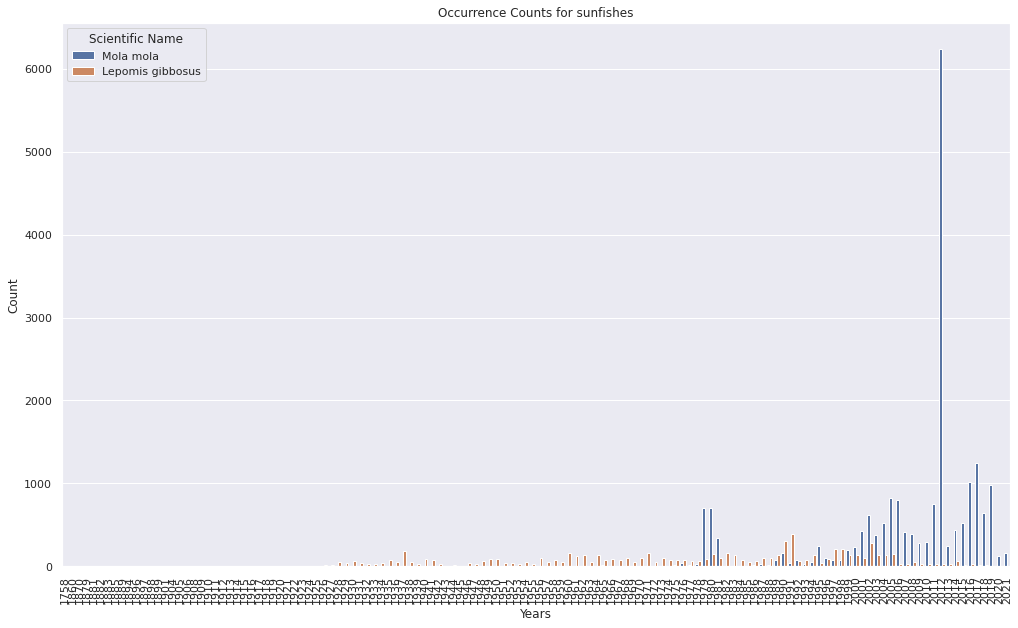

In [14]:
_df = _df.sort_values(by='date_year') # We will sort the data according to year
sns.set_style("darkgrid")
p = sns.countplot(data=_df,x='date_year',hue='scientificName')
p.set_xlabel("Years")
p.set_ylabel("Count")
p.set_title("Occurrence Counts for sunfishes")
p.set_xticklabels(_df.date_year.unique().astype(int),rotation=90)
p.legend(title='Scientific Name', loc="upper left");

We can see that *Lepomis Gibbosus* has barely got any occurrence records in comparison to *Mola mola*. But *Lepomis gibbosus* has got more uniform sampling than *Mola mola*.
But post 2005, records for *Lepomis gibbosus* has decreased signficantly, which is really alarming.

Let us dig deeper and zoom into the numbers after 2000 for *Lipomis gibbosus*.

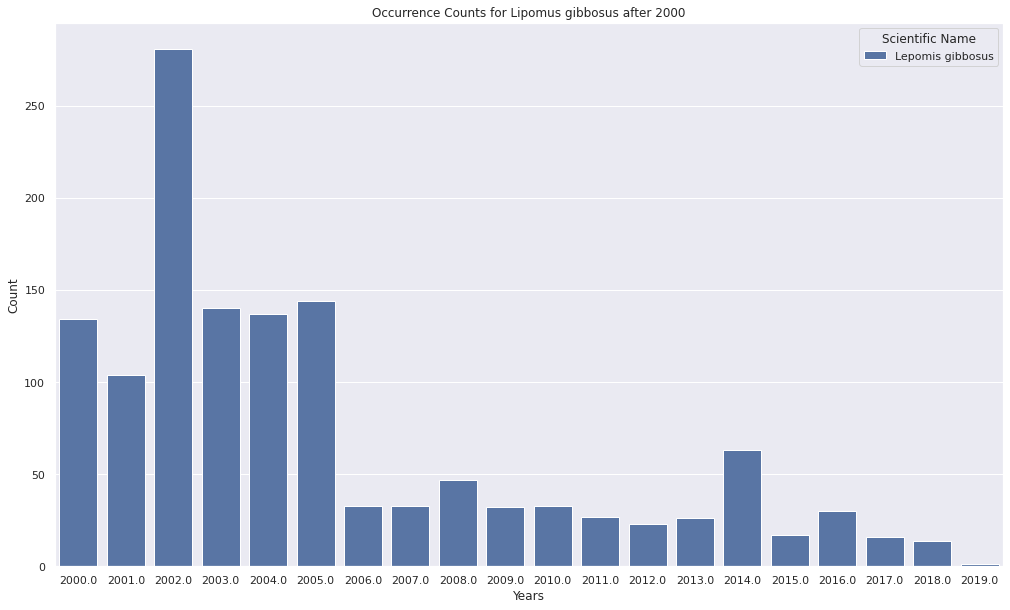

In [15]:
_df = _df[_df["date_year"]>=2000].sort_values(by='year') # We will visualize data only post 2000.
_df = _df[_df["scientificName"]=="Lepomis gibbosus"]
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(17,10)})
p = sns.countplot(data=_df,x='date_year',hue='scientificName')
p.set_xlabel("Years")
p.set_ylabel("Count")
p.set_title("Occurrence Counts for Lipomus gibbosus after 2000")
p.legend(title='Scientific Name');


We can see that *Lepomis gibbosus* has got lesser sampling 2005 onwards (the last records we found were from 2019.) **This is alarming**, maybe because their numbers may have went down significantly.

> *If you are interested*, This National Geographics [article](https://www.nationalgeographic.com/animals/fish/facts/ocean-sunfish) claims that *Mola*s are already vunerable and can die due to plastic waste. So, take steps forward and consume as much less plastic as you can. Thank you!



**Plotting records on a world map**

Now let us plot the records we have received so far on a world map. With `plotly` we can plot a geoplot easily.

Before this we will need to grab data about coordinates of occurrence records.

In [16]:
import plotly.graph_objects as go
import plotly.express as px

In [17]:
orthographic=0
fig = px.scatter_geo(sunfishDF,lat="decimalLatitude", lon="decimalLongitude", hover_name="scientificName")
fig.update_layout(height=400, margin={"r":0,"t":40,"l":0,"b":10}, title="World map for ocean sunfish species")
if (orthographic):
  fig.update_geos(projection_type="orthographic") # for a round earth
fig.show();

We can see that these two species of sunfish are mostly found in the nothern hemisphere waters. There is a strong possibility that the sampling efforts in those regions have been stronger than other places. But I feel strange that ocean sunfished can be seen on land too!

Before we move on, let us see a heatmap of these species that will help us know where are they in good numbers.

In [18]:
fig = go.Figure(go.Densitymapbox(lat=sunfishDF.decimalLatitude, lon=sunfishDF.decimalLongitude,radius=5))
fig.update_layout(mapbox_style='open-street-map', mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [19]:
try:
  import global_land_mask
except:
  %pip install global_land_mask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 


In [20]:
from global_land_mask import globe

In [21]:
sunfishDF.index = range(len(sunfishDF))
for i in range(len(sunfishDF)):
  sunfishDF.loc[i,"island"] = globe.is_land(sunfishDF.loc[i:i,"decimalLatitude"], sunfishDF.loc[i:i,"decimalLongitude"])

Let us study the migration patterns of *Mola mola*.

In [22]:
studyDF = sunfishDF[sunfishDF["island"]==False]
studyDF = studyDF[studyDF["scientificName"]=="Mola mola"]

In [23]:
fig = px.scatter_geo()
fig.update_layout(height=400, margin={"r":0,"t":40,"l":0,"b":10}, title="World map for ocean sunfish species")

fig.add_trace(go.Scattergeo(
        lon = studyDF['decimalLongitude'],
        lat = studyDF['decimalLatitude'],
        text = studyDF['scientificName'],
        opacity=0.4,
        marker = dict(
            size = 20,
            color = "green",
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
  
        )
        ))

fig.show();

We can make out some common migration paths from the above plot. It seems that *Mola*s might be migrating from Europe to Western Coast of Africa. Another common path is around the coasts of Australia.